# Ford GoBike System Data

## Wrangling Process

This data set includes 183412 entries about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
tripdata = pd.read_csv('fordgobike-tripdata.csv', parse_dates =['start_time', 'end_time'])

In [3]:
# high-level overview of data shape and composition
print(tripdata.shape)
print(tripdata.dtypes)

(183412, 16)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


In [4]:
tripdata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#Checking for dupliates
tripdata[tripdata.duplicated()].sum()

duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64

In [6]:
#Checking for null values
tripdata.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#Changing user_type, member_gender and bike_share_for_all_trip to categorical datatype 
tripdata['user_type'] = tripdata['user_type'].astype('category')
tripdata['member_gender'] = tripdata['member_gender'].astype('category')
tripdata['bike_share_for_all_trip'] = tripdata['bike_share_for_all_trip'].astype('category')
tripdata['start_station_name'] = tripdata['start_station_name'].astype('category')

In [8]:
#Checcking date information
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null category
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(4), datetime64[ns](2), float64(7), int64(2)

In [9]:
# descriptive statistics for numeric variables
tripdata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
tripdata['day'] = tripdata['start_time'].dt.day_name()

In [11]:
# convert day column to ordinal category
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                    'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = days_of_week)
tripdata['day'] = tripdata['day'].astype(ordered_var)

In [12]:
this_year = 2022
tripdata['age'] = this_year - tripdata['member_birth_year']

In [13]:
tripdata.head(9)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,63.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,Thursday,39.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,Thursday,33.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,Thursday,34.0


In [55]:
def piePercentagePlot(df, explode, title):
    '''
    docstring: This function is used to plot bar chart,
               it takes 3 positional arguments which are:
               1. Dataframe
               2. placeholder
               3. explode
    inputs: The DataFrame, The column to be plotted.
    output: This function will print out a pie chart based on the xVar entered.
    '''
    # plot
    df.value_counts().plot(kind = 'pie',
                              figsize=(8, 8),
                              explode = explode,
                              autopct='%1.2f%%');
    
    # Adding title and formatting it
    plt.title(f'Plots for Percentage by {title}'.title(), fontsize = 14, weight = "bold")

### What is the structure of your dataset?

There are 174952 bike trip information in the dataset with 10 features (**duration_sec**, **start_time**, **end_time**, **start_station_id**,**start_station_name**, **start_station_latitude**,**start_station_longitude**, **end_station_id**, **end_station_name**,**end_station_latitude**, **end_station_longitude**, **bike_id**, **user_type**,**member_birth_year**, **member_gender**, **bike_share_for_all_trip**).

## The main feature(s) of interest in the dataset

I am interested in figuring out when and where are most trips taken because this dataset includes start time/location and end time/location. I focus on the starting points.

I am  also interested in what are the characteristics (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations.

How long does average trip take?

What is the day with the highest and  fewest trips?

Data relating to User Type (Subscriber or Customer).

Do Age and Sex of user affect the Trip?

Do season (time of the year) affect the Trip?

## The features in the dataset help to support the investigation into the feature(s) of interest
I expect the Caltrain or Bart stations in San Francisco will have more trips than other locations because those stations are in the center of the city and connect to other major transportations. Morning and afternoon will have more trips than night time due to rush hours. Also, I assume younger riders are more than older riders because of physical abilities



In [14]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null category
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
day                        183412 non-null category
age     

In [15]:
base_color = sns.color_palette()[0]

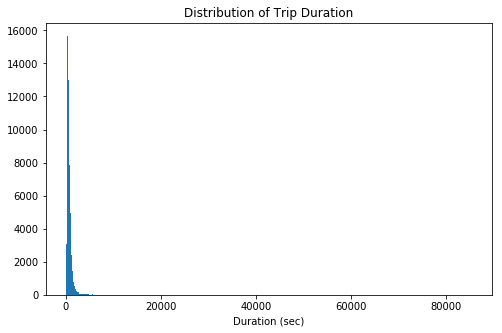

In [16]:
binsize = 60
bins = np.arange(0, tripdata['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x ='duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

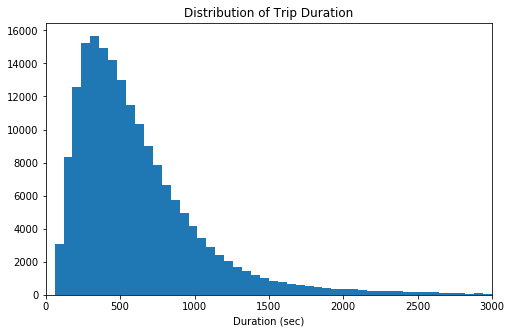

In [17]:
binsize = 60
bins = np.arange(0, tripdata['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x ='duration_sec', bins = bins)
plt.xlim(0, 3000)
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

The distribution is right-skewed, with a really long tail

I want to try looking into the tailof this chart

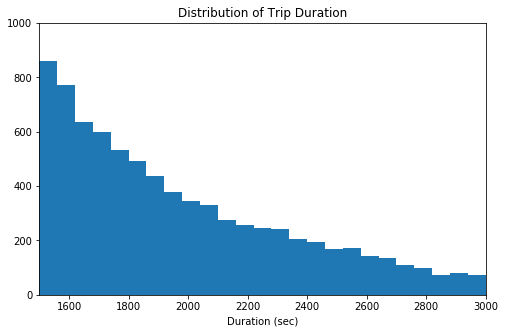

In [18]:
binsize = 60
bins = np.arange(0, tripdata['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x ='duration_sec', bins = bins)
plt.xlim(1500, 3000)
plt.ylim(0, 1000)
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

Looking further into the extreme tail

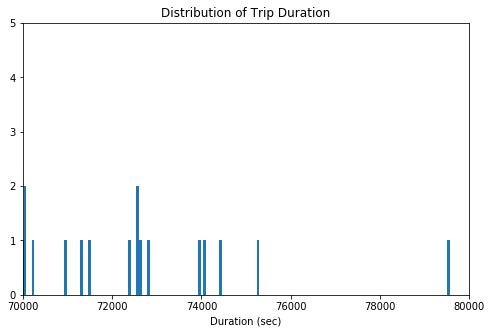

In [19]:
binsize = 60
bins = np.arange(0, tripdata['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x ='duration_sec', bins = bins)
plt.xlim(70000, 80000)
plt.ylim(0, 5)
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

- There are very few trips taken for very long duration 

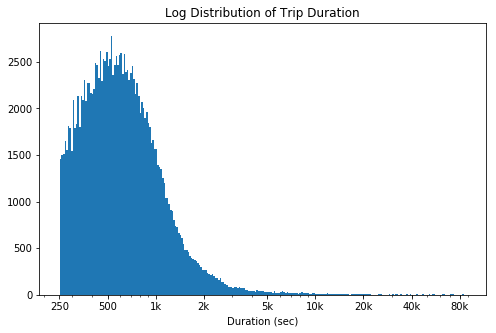

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10(tripdata['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], 
           ['250', '500', '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('Duration (sec)')
plt.title('Log Distribution of Trip Duration')
plt.show()

In [21]:
# creating trip duration variable in minute
tripdata['duration_min'] = tripdata['duration_sec'] / 60

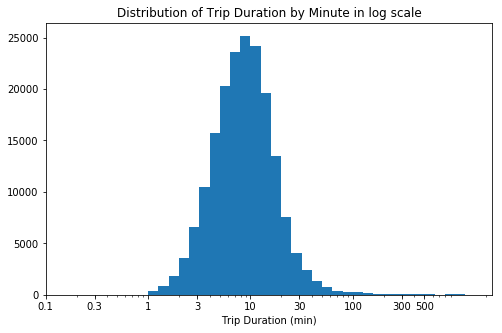

In [22]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(tripdata['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,500]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration by Minute in log scale')
plt.show();

* The trip duration has a long-tailed distribution right-skew 

* The average duration around 10 minutes.

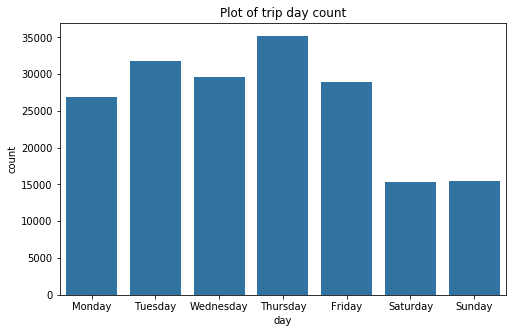

In [23]:
plt.figure(figsize=[8, 5])
sns.countplot(data = tripdata, x = 'day', color = base_color)
plt.title('Plot of trip day count');

* As seen above, Thursday and Tuesday are the days with the highest trip, while Saturday and Sunday (weekends) have fewest trips

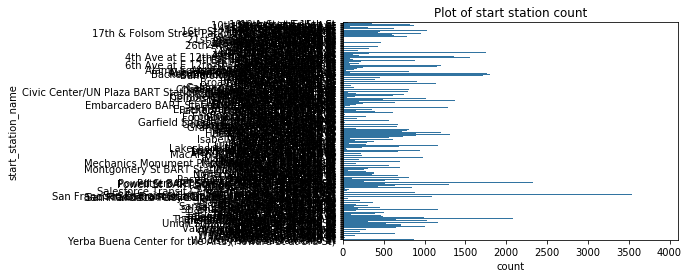

In [24]:
sns.countplot(data = tripdata, y = 'start_station_name', color = sns.color_palette()[0])
plt.title('Plot of start station count');

This Plot is to visualize number of trips based on start location
But it is not a proper plot, therefore I will focus on 20 locations with the highest and lowest trips

In [25]:
top_20 = tripdata.start_station_name.value_counts()[:20]

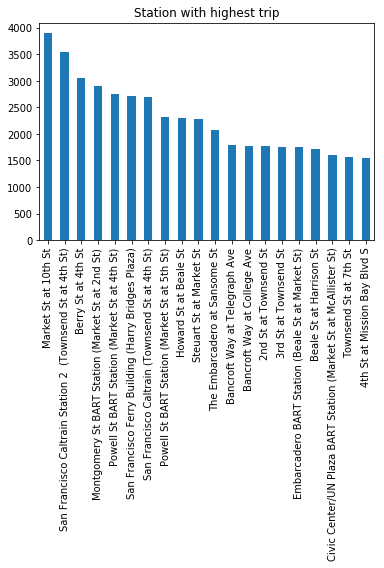

In [26]:
top_20.plot(kind = 'bar', color = base_color)
plt.title('Station with highest trip');

* **Market St** have the highest number of trips

In [27]:
bottom_20 = tripdata.start_station_name.value_counts(ascending= True)[:20]

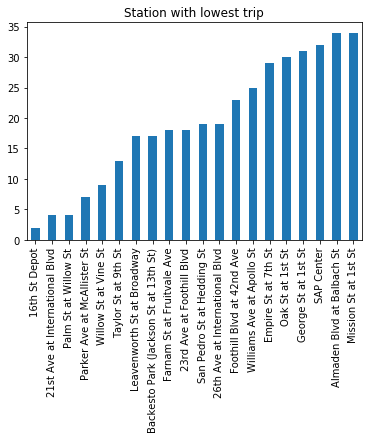

In [28]:
bottom_20.plot(kind = 'bar', color = base_color)
plt.title('Station with lowest trip');

* **16th St Depot** have the least trips which is just 2 trips

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


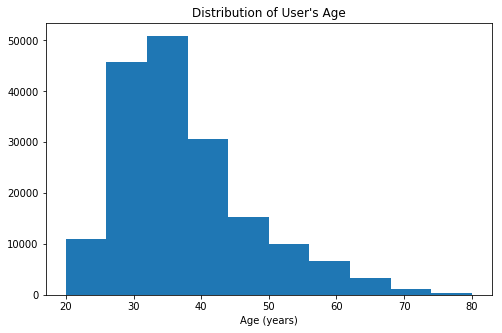

In [29]:
# creating plot based on age
plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x ='age', range = (20, 80))
plt.xlabel('Age (years)')
plt.title('Distribution of User\'s Age')
plt.show();

* Obviously the older peoplehave the least trip while the people with middle age (27 to 37) have the highest number of trips (upto 70000 in total)

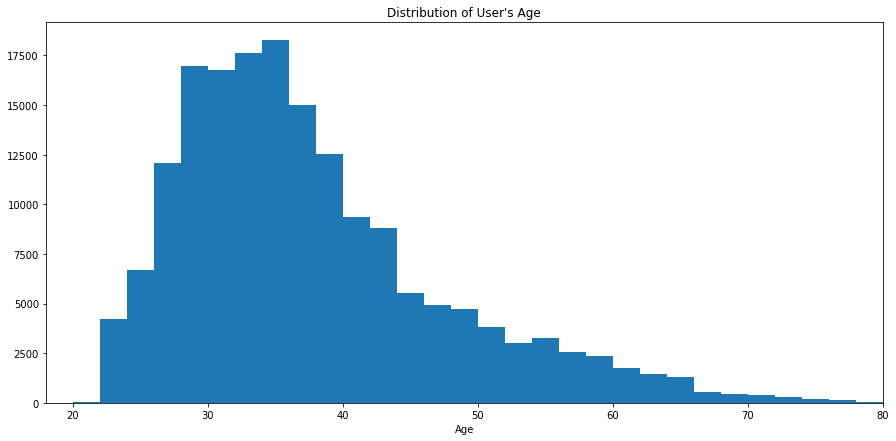

In [67]:
# looking dipper into the distribution of age
plt.figure(figsize = [15, 7])

binsize = 2
bins = np.arange(0, tripdata['age'].max()+binsize, binsize)

plt.hist(data = tripdata, x = 'age',range = (20, 80), bins = bins)
plt.xlim(18, 80)
plt.xlabel('Age')
plt.title('Distribution of User\'s Age')
plt.show()


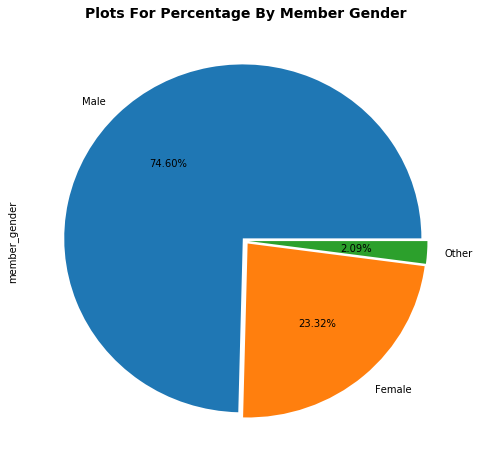

In [54]:
piePercentagePlot(tripdata.member_gender, [0.02, 0.02, 0.02], 'member gender')

* According to the gender plot, The male gender has the highest percentage of trips more than 70%, while the female gender has 23%, then the other gender have 2%

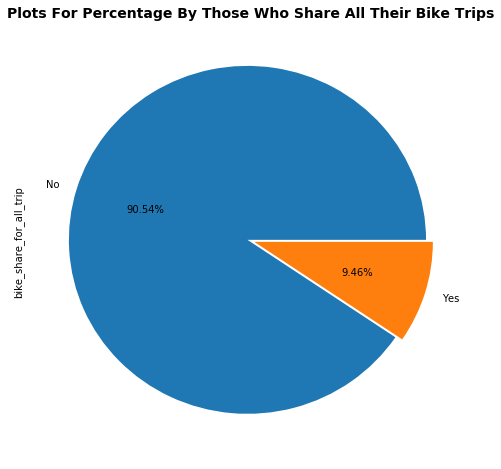

In [56]:
piePercentagePlot(tripdata.bike_share_for_all_trip, (0.02, 0.02), 'those who share all their bike trips')

* The chart above the percentage of those that share their trips

Most trip are not shared

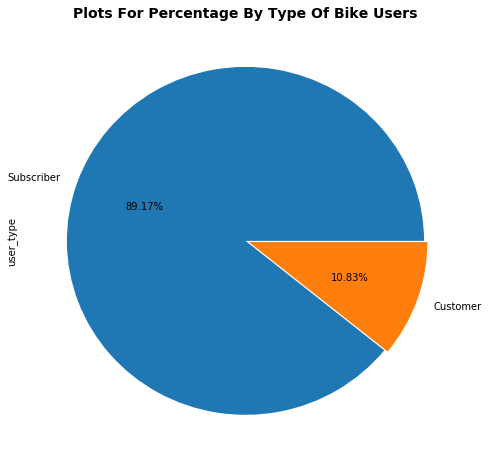

In [59]:
piePercentagePlot(tripdata.user_type, (0, 0.02), 'Type of bike users')

* The chart above shows that subscribers have the higher percentage of trips recorded in this datset

## Bivariate Exploration
In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

I want to look at how trip duration is affected by day of week


In [71]:
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 
                'start_station_latitude','start_station_longitude', 'end_station_id',
                'end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year', 'age']
categorical_vars = ['start_station_name', 'end_station_name', 'user_type',
                   'member_gender', 'bike_share_for_all_trip', 'day']

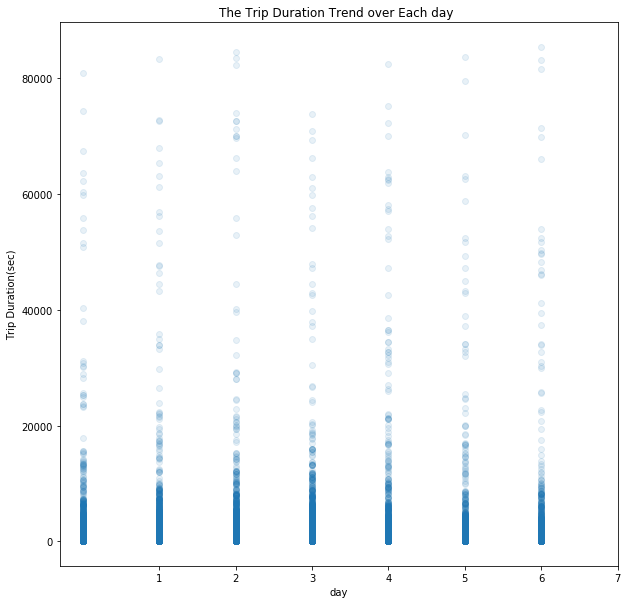

In [72]:
# check the trip duration over each day.
plt.figure(figsize = [10,10])
plt.scatter(data = tripdata, x = 'day' , y = 'duration_sec' , alpha = 0.1)
tick_labels = [1, 2, 3, 4, 5, 6,7]
plt.xticks(tick_labels, tick_labels)
plt.title('The Trip Duration Trend over Each day ')
plt.xlabel('day')
plt.ylabel('Trip Duration(sec)');

* From the weekday vs duration scatter plot, the duration is equal

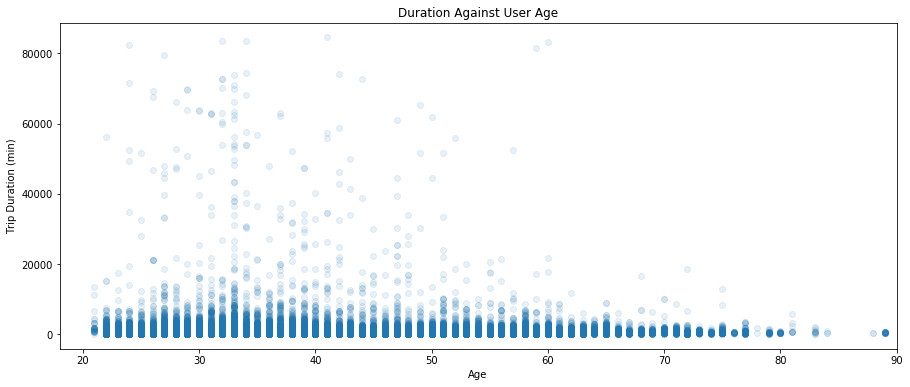

In [73]:
# scatter plot of duration vs. age
plt.figure(figsize = [15, 6])
plt.scatter(data = tripdata, x = 'age', y = 'duration_sec', alpha = 1/10)
plt.xlabel('Age')
plt.xlim(18, 90)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()


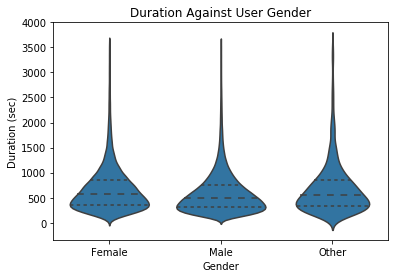

In [74]:
# query the data for duration only below 1 hour to focus the data
df_hour = tripdata.query("duration_sec < 3600")
# plot relationship between gender and duration
sns.violinplot(data=df_hour, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User Gender');


* Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.


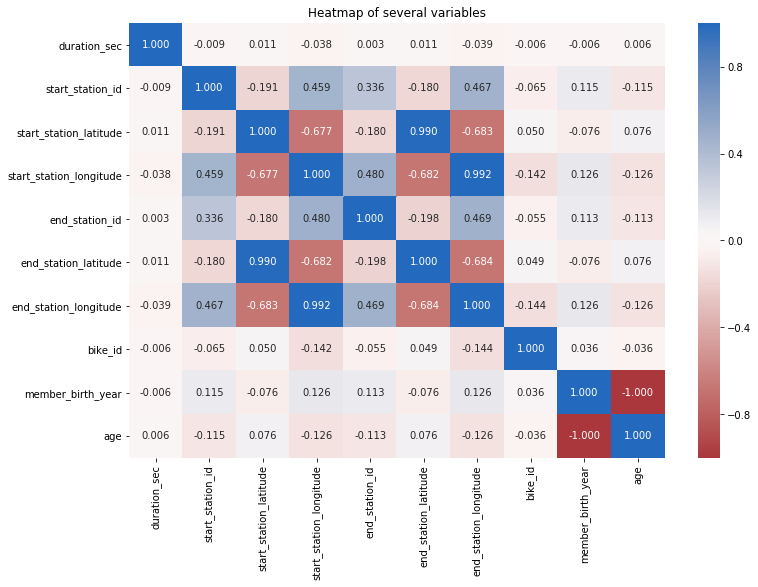

In [75]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(tripdata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap of several variables')
plt.show()

# Multivariate Exploration
I want to investigate on the relationship between the trip duration and the age and gender of the users.



In [76]:
# generate a new field for member age group
tripdata['member_age_bins'] = tripdata['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 50<x<=70
                                                  else '70 - 80' if 50<x<=80  
                                                  else '80 - 90' if 50<x<=90
                                                  else '>90' )


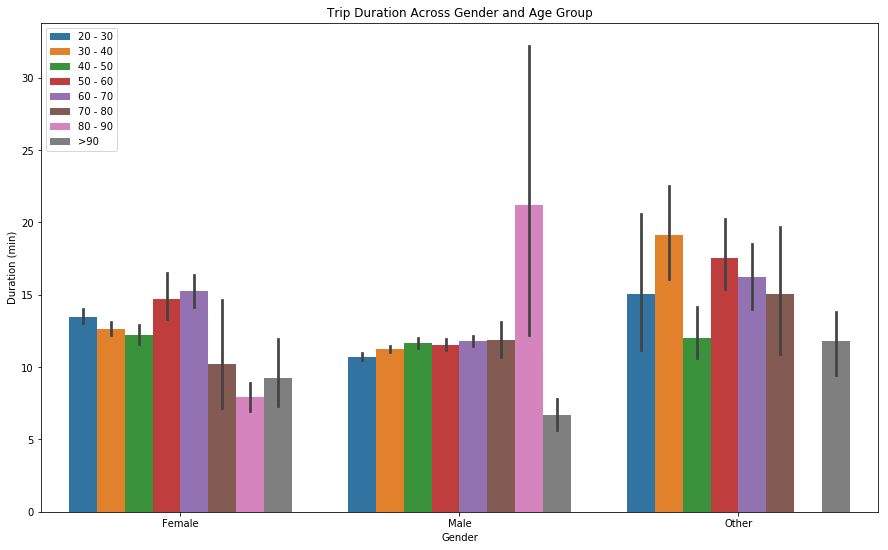

In [61]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [15, 9])

ax = sns.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=tripdata.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()


# Conclusion
In 2019, the average trip duration that the users took was around 10 minutes.

89.2% of the total trips were taken by Subscribers, which are members of the GoBike program.

Also, the age group with the most trips was between 30-35 years old.

The Customers users (casual users) usually took more time in their rides than Subscribers.

In Female , the age range of 10-20 has the longest trip duration. The longest trip duration in male belongs to the 60-70 age group. Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.